In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.color import rgb2gray
from skimage.color import gray2rgb

<function matplotlib.pyplot.show(*args, **kw)>

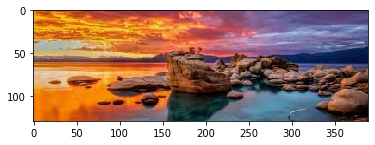

In [2]:
path = r'C:\Users\victo\Documents\ee\C++ with DSP\download.jpg'
img_bgr  = cv2.imread(path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # converts bgr to rgb so that the image can be plotted correctly
imgplot = plt.imshow(img_rgb)
#imgplot = plt.imshow(img_bgr) #if u wanted to see the red and blue channels reversed
plt.show

In [3]:
#the shape of the image is np.shape(img)
np.shape(img_bgr)

(129, 389, 3)

In [4]:
#first step to convert gray scale should be 196 183 1
im_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY) # since most cv2 functions use bgr formatt stick with it
np.shape(im_gray)

(129, 389)

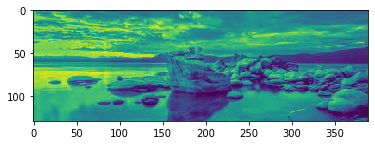

In [5]:
imgplot = plt.imshow(im_gray) #without the right cmap

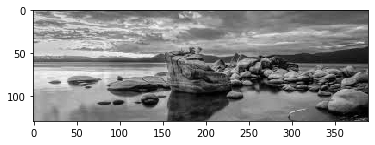

In [6]:
grayimgplot = plt.imshow(im_gray, cmap = "gray") # with the right cmap

In [7]:
im_gray_resize = cv2.resize(im_gray,(300,100))
np.shape(im_gray_resize)

(100, 300)

In [8]:
def myFunction(image,n):
    image[0:500:n, 0:500:2] = 255
    return image

In [9]:
new_image = myFunction(im_gray_resize, 10)
np.shape(new_image)

(100, 300)

In [10]:
#img_un8 = np.array(new_image, dtype=np.uint8)

back2rgb = cv2.cvtColor(new_image,cv2.COLOR_GRAY2RGB)

In [11]:
np.shape(back2rgb)

(100, 300, 3)

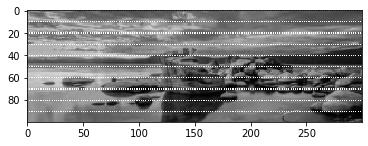

In [12]:
plz_work = plt.imshow(back2rgb, vmin=0, vmax = 255)

This is the color image, it simply looks black and white becuase all the channels are the same as you can see:

In [13]:
back2rgb[0,0,0:3]

array([255, 255, 255], dtype=uint8)

In [14]:
back2rgb[23,23,0:3]

array([122, 122, 122], dtype=uint8)

In [15]:
back2rgb[42,24,0:3]

array([133, 133, 133], dtype=uint8)

If you wanted to simply convert data back from gray to rgb then that is impossible unless you have a color map or some heavy image processing. A color map might be a easier solution, it maps what color should be at each color intensity

In [16]:
#retrieving a cmap
cmap = plt.get_cmap('Spectral') #different cmaps can be tested here
#applying a cmap
rgb_cmap_img = cmap(new_image)
# a cmap scales each pixel in a gray image differently in accordance to it's color to intensity mapping

In [17]:
np.shape(rgb_cmap_img) # the 4th channel is the alpha channel

(100, 300, 4)

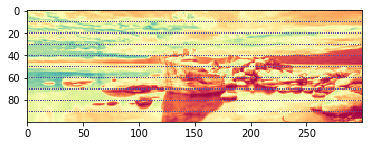

In [18]:
plz_work = plt.imshow(rgb_cmap_img, cmap = "Spectral") # plotting in accordance to the cmap used

There are more advanced ways of solving this problem using known values and solving a giant matrix system of equations, you could possibily even use the original rgb2gray conversion weights to create your own cmap but that is probably outside of the scope of this project Crows. 